In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_n = int(input("Number of Neurons (Default = 120) : ") or "120")
time = float(input("Time in ms (Default = 1000) : ") or "1000")
eps = float(input("Time Resolution (Default = 0.01) : ") or "0.01")

current_input = np.zeros((n_n,int(time/eps)))
t = np.arange(0,time,eps)

y = np.where(t<600,(1-np.exp(-(t-100)/75)),0.9996*np.exp(-(t-600)/150))
y = np.where(t<100,np.zeros(t.shape),y)

fac = 10
p_input = 0.33
input_neurons = np.random.choice(np.array(range(n_n)),int(p_input*n_n),replace=False)

current_input[input_neurons,:]= fac*y

np.save("current",current_input)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def K_prop(V):
    T = 22
    phi = 3.0**((T-36.0)/10)
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(np.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*np.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_inf = alpha_n/(alpha_n+beta_n)
    
    return n_inf, t_n


def Na_prop(V):
    T = 22
    phi = 3.0**((T-36)/10)
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(np.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(np.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*np.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(np.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return m_inf, t_m, h_inf, t_h

In [4]:
%matplotlib inline

In [10]:
plt.style.use('ggplot')

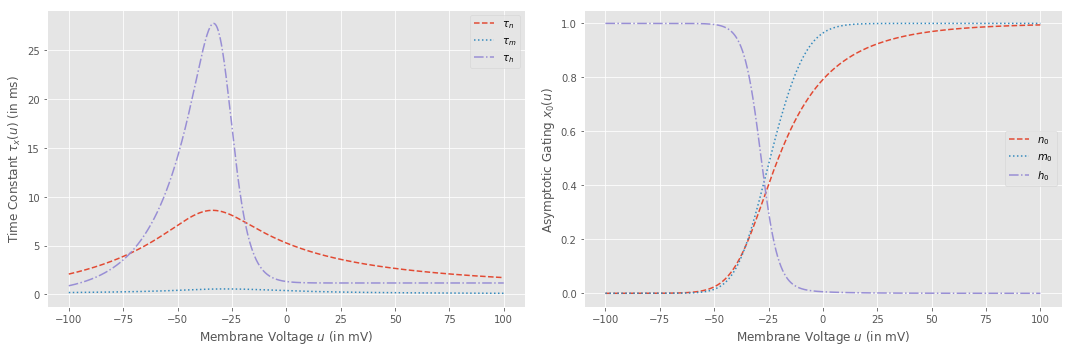

In [13]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(-100,100,0.01),K_prop(np.arange(-100,100,0.01))[1],'--',label=r"$\tau_n$")
plt.plot(np.arange(-100,100,0.01),Na_prop(np.arange(-100,100,0.01))[1],':',label=r"$\tau_m$")
plt.plot(np.arange(-100,100,0.01),Na_prop(np.arange(-100,100,0.01))[3],'-.',label=r"$\tau_h$")
plt.xlabel(r"Membrane Voltage $u$ (in mV)")
plt.ylabel(r"Time Constant $\tau_x(u)$ (in ms)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(-100,100,0.01),K_prop(np.arange(-100,100,0.01))[0],'--',label=r"$n_0$")
plt.plot(np.arange(-100,100,0.01),Na_prop(np.arange(-100,100,0.01))[0],':',label=r"$m_0$")
plt.plot(np.arange(-100,100,0.01),Na_prop(np.arange(-100,100,0.01))[2],'-.',label=r"$h_0$")
plt.xlabel(r"Membrane Voltage $u$ (in mV)")
plt.ylabel(r"Asymptotic Gating $x_0(u)$ ")
plt.legend()
plt.tight_layout()
fig.savefig("mhn.eps",format="eps")